In [81]:
#Sources:https://www.youtube.com/watch?v=EYnC4ACIt2g
# https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a
# https://www.youtube.com/watch?v=QIUxPv5PJOY&t=2383s
# https://www.youtube.com/watch?v=hOLSGMEEwlI&t=251s
# https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

import math
import pandas as pd 
import pandas_datareader as web 
import numpy as np 

from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#get tesla stock info 
df = web.DataReader('tsla', data_source= 'yahoo',start= '2012-01-01', end = '2020-05-04') 
df



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000
...,...,...,...,...,...,...
2020-04-28,805.000000,756.690002,795.640015,769.119995,15222000,769.119995
2020-04-29,803.200012,783.159973,790.169983,800.510010,16216000,800.510010
2020-04-30,869.820007,763.500000,855.190002,781.880005,28471900,781.880005


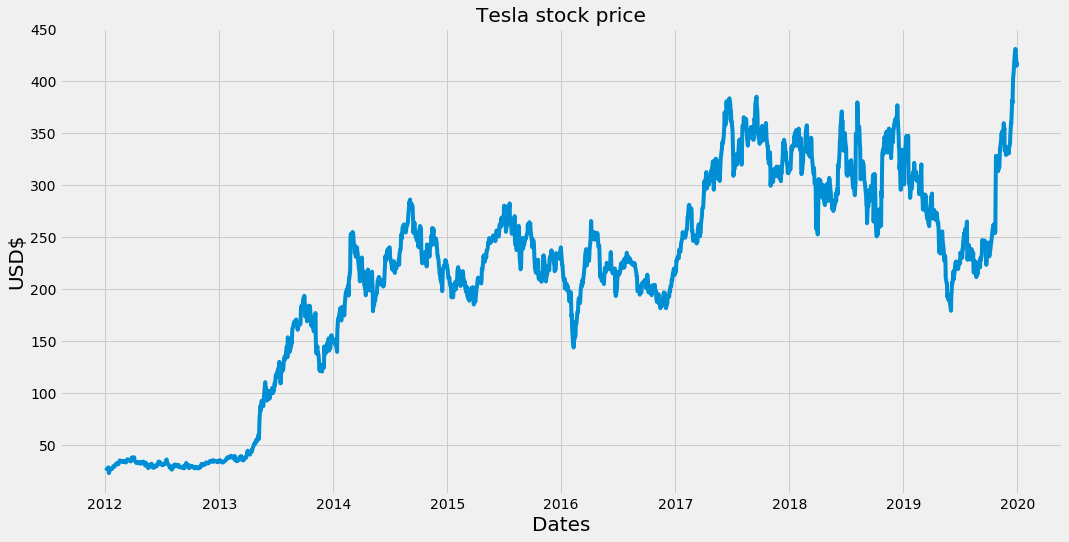

In [20]:
# dimension of the dataset 
df.shape

# Visualiz the closing price
plt.figure(figsize= (16,8))
plt.plot(df['Close'])
plt.title('Tesla stock price')
plt.xlabel('Dates', fontsize= 20)
plt.ylabel('USD$', fontsize= 20)
plt.show()



In [61]:
#create a new data frame with closing price and converting it to a Numpy array
data = df.filter(['Close']) 
dataset = data.values
training_data_len= math.ceil(len(dataset)*0.8)

training_data_len

1678

In [62]:
#Scale the data
scaler= MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data




array([[0.00591306],
       [0.00549948],
       [0.00483999],
       ...,
       [0.84849605],
       [0.75844765],
       [0.82536917]])

In [63]:
# create the training data set 
train_data = scaled_data[0:training_data_len, :]

x_train= []
y_train= []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61: 
        print(x_train)
        print(y_train)
        print()
    

    


[array([0.00591306, 0.00549948, 0.00483999, 0.00460525, 0.0049853 ,
       0.00539888, 0.00608072, 0.00610308, 0.        , 0.00425874,
       0.00449348, 0.00443759, 0.00425874, 0.00444877, 0.00517532,
       0.0057901 , 0.00687435, 0.00731028, 0.00757855, 0.00701966,
       0.00758973, 0.00833864, 0.00934464, 0.0100712 , 0.00984765,
       0.01021651, 0.01094307, 0.00928876, 0.00972469, 0.01160256,
       0.01208321, 0.01273152, 0.01361457, 0.01308921, 0.01277623,
       0.01312274, 0.01225087, 0.01210556, 0.01231794, 0.01187083,
       0.01298861, 0.01257503, 0.01227323, 0.0115355 , 0.01154667,
       0.01149078, 0.01335748, 0.01477706, 0.01486648, 0.01397226,
       0.0136481 , 0.01400579, 0.01362574, 0.01360339, 0.01381577,
       0.01297743, 0.01261974, 0.01633077, 0.01693437, 0.01683377])]
[0.016252530328918307]

[array([0.00591306, 0.00549948, 0.00483999, 0.00460525, 0.0049853 ,
       0.00539888, 0.00608072, 0.00610308, 0.        , 0.00425874,
       0.00449348, 0.00443759, 0.0

In [64]:
#Convert the data to numpy arrays and reshape the data for LSTM 
x_train, y_train= np.array(x_train), np.array(y_train)

x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

x_train.shape





(1618, 60, 1)

In [82]:
#Build the LSTM model 
model= Sequential()
# adding the LSTM layer with 40 neurons 
model.add(LSTM(40, return_sequences= True, input_shape =(x_train.shape[1],1)))
# adding a second LSTM layer with 60 neurons 
model.add(LSTM(60, return_sequences= False))

# adding a Dense layer with 25 neurons 
model.add(Dense(25))
model.add(Dense(1))





In [83]:
#compile the model 
#the optimizer is used to improve the loss function. Loss function how well is the model
model.compile(optimizer= 'adam', loss='mean_squared_error')
#train the model, fit means train
model.fit(x_train, y_train, batch_size= 1, epochs=1)

 

Epoch 1/1
1618/1618 [==============================] - 55s 34ms/step - loss: 4.3511e-04


In [84]:
#create the testing data set 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data set x_test and y_test
x_test= []
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,])
    
#Covert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions= model.predict(x_test)
predictions= scaler.inverse_transform(predictions)




In [85]:
#Get the root mean squared error (RMSE)
rmse= np.sqrt(np.mean( predictions- y_test)**2)
rmse


# rmse of zero means the prediciton is perfect


9.947832567310561

/Users/alexyiu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


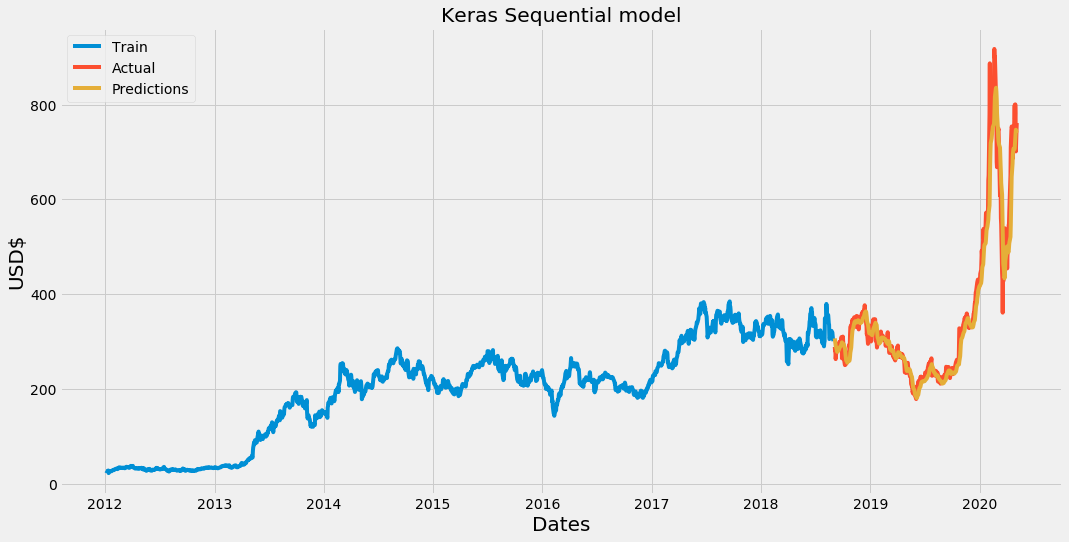

In [80]:
#Plot the data 

train= data[:training_data_len]
valid= data[training_data_len:]
valid['Predictions']= predictions

plt.figure(figsize= (16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.title('Keras Sequential model')
plt.xlabel('Dates', fontsize= 20)
plt.ylabel('USD$', fontsize= 20)
plt.legend(['Train','Actual','Predictions'],loc= 'upper left')
plt.show()

